# Contents
1. [勾配法](#%E5%8B%BE%E9%85%8D%E6%B3%95)
    1. [1変数関数](#1%E5%A4%89%E6%95%B0%E9%96%A2%E6%95%B0)
    1. [多変数関数](#%E5%A4%9A%E5%A4%89%E6%95%B0%E9%96%A2%E6%95%B0)

# 勾配法（最急降下法、山登り法）
gradientが最大になる方向へステップを刻む  
1. 勾配$\nabla f$を与える必要があるので微分できない関数には使えない
1. 最大値・最小値以外に極値が存在する場合、初期値によっては最大値・最小値以外の極値に到達する可能性がある
1. 極値が1つしかない場合でも、関数形によっては計算効率が悪くなる（勾配がなくなるので）

## 1変数関数
__Algorithm 3.1__  

In [ ]:
using PyPlot
using LinearAlgebra
using Printf

In [1]:
function sgn(X)
    if X < 0
        return -1.0
    elseif X==0
        return 0.0
    else
        return 1.0
    end
end

function search(X₀, f, f_diff; δ=1.0, h₀=1.0)
    X=X₀
    X_steps = Array([[X]])
    while norm(f_diff(X))>=δ
        h=sgn.(f_diff(X)).*abs(h₀)
        X1=X
        X2=X.+h
        if f(X1)<f(X2)
            while f(X1)<f(X2)
                h=2h
                X1=X2
                X2= X1.+h
            end
            X=X1
            h=h./2.0
        else
            while f(X1)>f(X2)
                h=h./2.0
                X2=X2.-h
            end
            X=X2
            h=2 .* h
        end
        append!(X_steps, [[X]])
    end
    return X, Array(transpose(hcat(X_steps...)))
end

search (generic function with 1 method)

以下の関数の最大値をとるxを数値的に求める\*
$$
f(x) = -\left(x^2 +10 \sin (x)\right)
$$
最大値をとるxは大体1.3くらい。  
\*[scipy lecture note](http://www.turbare.net/transl/scipy-lecture-notes/intro/scipy.html)より

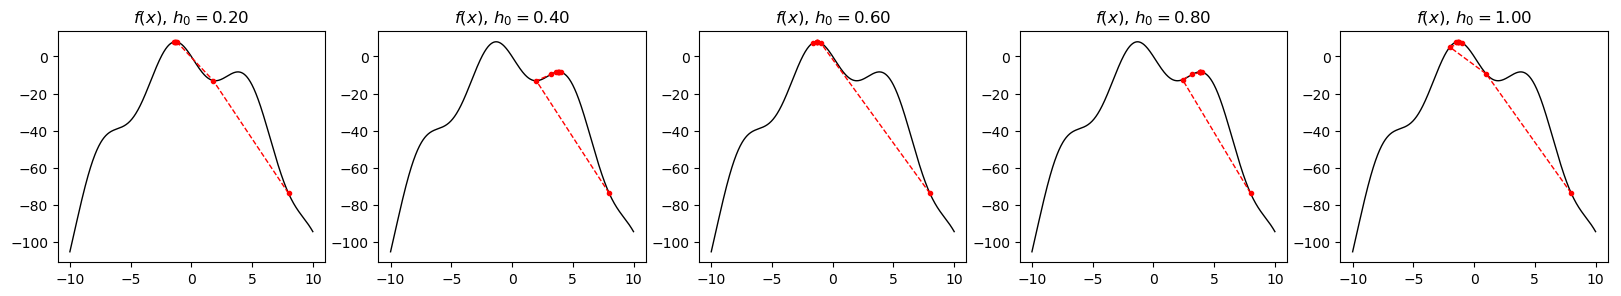

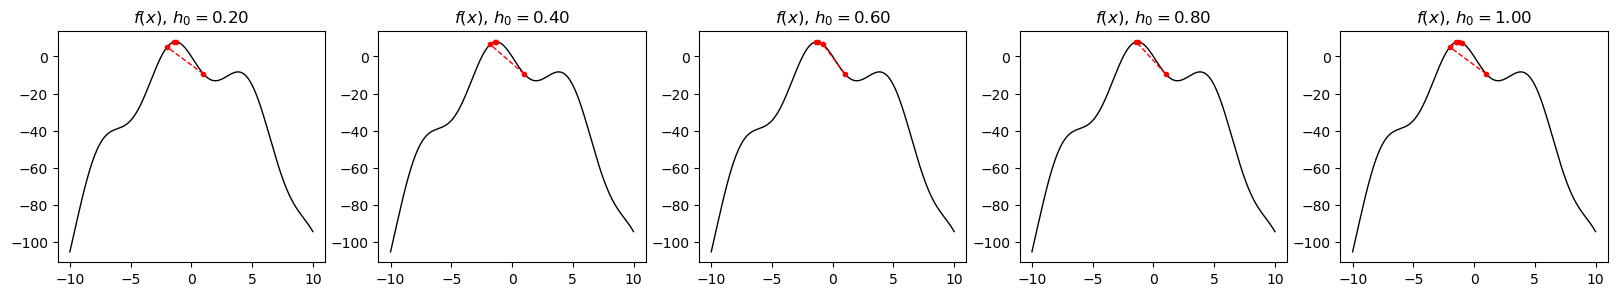

In [3]:
f(x)=-(x^2.0 + 10.0*sin(x))
f_diff(x)=-(2.0*x + 10.0*cos(x))
x=range(-10,stop=10,length=1000)
δ=1e-2


x₀=8.0
h₀_list=range(0.2,stop=1.0, length=5)
figsize = (20,3)
fig,axes=subplots(1,5,figsize=figsize)
for (i,h₀) in enumerate(h₀_list)
    x_estimated,x_steps=search(x₀, f, f_diff, h₀=h₀, δ=δ)
    ax=axes[i]
    ax[:set_title](L"$f(x)$, $h_0=$"* @sprintf("%2.2f",h₀))
    ax[:plot](x, f.(x), color="k", lw=1)
    ax[:plot](x_steps, f.(x_steps), color="r", lw=1, ls="--", marker="o", markersize=3)
end


x₀=1.0
h₀_list=range(0.2,stop=1.0, length=5)
figsize = (20,3)
fig,axes=subplots(1,5,figsize=figsize)
for (i,h₀) in enumerate(h₀_list)
    x_estimated,x_steps=search(x₀, f, f_diff, h₀=h₀)
    ax=axes[i]
    ax[:set_title](L"$f(x)$, $h_0=$"* @sprintf("%2.2f",h₀))
    ax[:plot](x, f.(x), color="k", lw=1)
    ax[:plot](x_steps, f.(x_steps), color="r", lw=1, ls="--", marker="o", markersize=3)
end

初期値の値によって異なる極値へ到達してしまうことがわかる。  

## 多変数関数
__Algorithm 3.2__  
多変数関数でも基本的に1変数関数の場合と同様。  
$\nabla f$の方向の直線状で関数値が最大になる点まで進むことを繰り返す（直線探索）

6つこぶラクダの背関数\*の最小値を求める（つもりだった）。
$$
\begin{align}
f(x, y) &= (4 - 2.1x^2 + \frac{x^4}{3})x^2 + xy + (4y^2 - 4)y^2 \\
\nabla f &= \left(\begin{array}{c}
\frac{\partial f}{\partial x} \\
\frac{\partial f}{\partial y}
\end{array}\right)
= \left(\begin{array}{c}
8x-8.4x^3 + 2x^5+y \\
x+16y^3-8y
\end{array}\right)
\end{align}
$$
\*[scipy lecture note](http://www.turbare.net/transl/scipy-lecture-notes/intro/scipy.html)より

In [4]:
# 最大値を探しに行くアルゴリズムなので符号反転した
f(x) = ((4-2.1*x[1]^2 + (x[1]^4)/3)*x[1]^2 + x[1]*x[2] + (4x[2]^2-4)*x[2]^2) .* (-1.0)
∇f(x) = [8x[1]-8.4x[1]^3+2x[1]^5+x[2]; x[1]+16x[2]^3-8x[2]] .*(-1.0)

∇f (generic function with 1 method)

まずは関数をプロットして概観をつかむ。

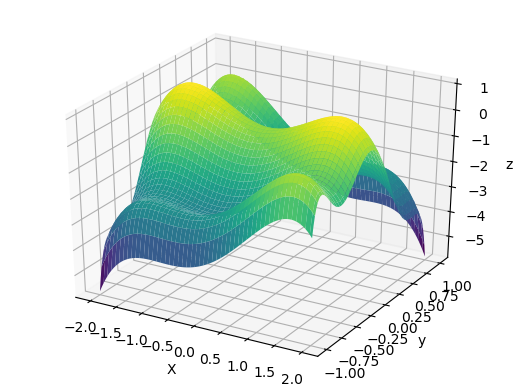

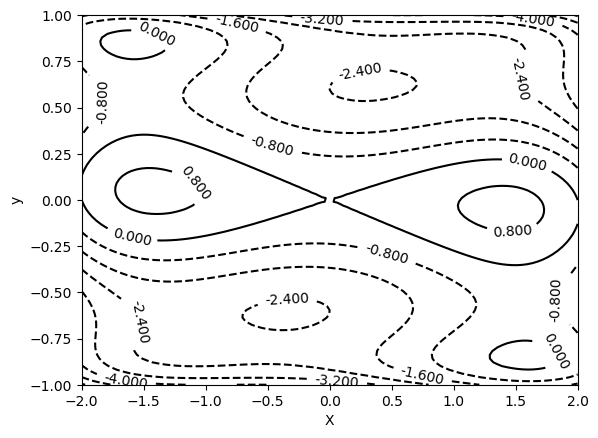

PyObject Text(24.0, 0.5, 'y')

In [5]:
xx=collect(range(-2,stop=2,length=100))
yy=collect(range(-1,stop=1,length=100))
z=zeros(length(xx),length(yy))

for (i,x) in enumerate(xx)
    for (j,y) in enumerate(yy)
        z[i,j]=f([x,y])
    end
end

figure()
surf(xx,yy,z, cmap="viridis")
ax=gca()
ax[:set_xlabel]("X")
ax[:set_ylabel]("y")
ax[:set_zlabel]("z")

figure()
_cp=contour(xx,yy,z, colors="k", lw=1, levels=10)
ax=gca()
ax[:clabel](_cp, inline=1, fontsize=10)
ax[:set_xlabel]("X")
ax[:set_ylabel]("y")


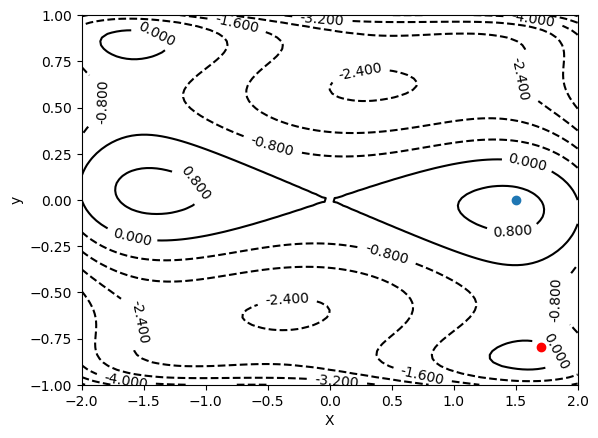

PyObject <matplotlib.collections.PathCollection object at 0x0000000039A83898>

In [6]:
function hill_climbing(x₀,t₀,δ,f,∇f;h₀=1.0)
    x=x₀
    x_steps=[x]
    t=t₀
    Δx=[Inf,Inf]
    while norm(Δx)>=δ
        F(t)=f(x.+t.*∇f(x))
        dFdt(t)=dot(∇f(x.+t.*∇f(x) ), ∇f(x))
        t_estimated,t_steps=search(t,F,dFdt,h₀=h₀)
        Δx=t_estimated.*∇f(x)
        x=x.+Δx
        append!(x_steps,[x])
        t=t_estimated
    end
    return x, Array(transpose(hcat(x_steps...)))
end

x₀=[1.5, 0.0]   #[-3,3]より外に出ると計算時間が爆発（勾配消失？）
t₀=0.01
h₀=1.0
δ=1e-8

x,x_steps=hill_climbing(x₀,t₀,δ,f,∇f,h₀=h₀)

figure()
_cp=contour(xx,yy,z, colors="k", lw=1, levels=10)
ax=gca()
ax[:clabel](_cp, inline=1, fontsize=10)
ax[:set_xlabel]("X")
ax[:set_ylabel]("y")
ax[:scatter](x[1], x[2], c="r")
ax[:scatter](x₀[1], x₀[2])

青が始点、赤が終点である。上記の関数だとうまく計算ができなかった（複雑な多峰だから？）。  
変数変換なんかせずに実装したほうが素直で良いかもしれないが、今回はsearch関数を教科書通りに再利用した。  

簡単な関数なら上手く行くだろうということで、次に単峰の2次元ガウス関数で試した。  
式は以下の通り。
$$
\begin{align}
f(\boldsymbol{x}) &= \exp\left(-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^\mathrm{T}Σ^{-1}(\boldsymbol{x}-\boldsymbol{\mu})\right) \\
\nabla f(\boldsymbol{x}) &= \exp\left(-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^\mathrm{T}Σ^{-1}(\boldsymbol{x}-\boldsymbol{\mu})\right) \cdot \left(-Σ^{-1}(\boldsymbol{x}-\boldsymbol{\mu})\right) \\
\boldsymbol{\mu} &= \left(\begin{array}{c}
0 \\
0
\end{array}\right),\;\;
\Sigma=\left(\begin{array}{cc}
1 & 0 \\
0 & 2
\end{array}\right)
\end{align}
$$



まずは可視化

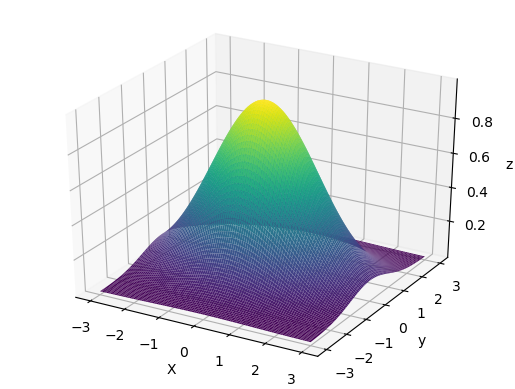

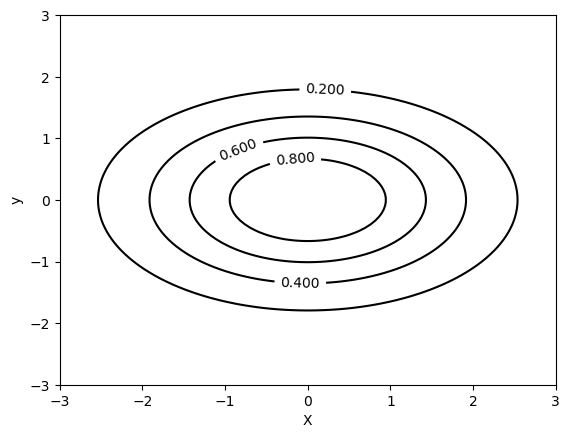

PyObject Text(24.000000000000007, 0.5, 'y')

In [7]:
μ=[0.0, 0.0]
Σ=[1.0 0.0; 0.0 2.0]
Σ_inv=inv(Σ)
f(x)=exp(-(x-μ)'*Σ_inv*(x-μ) * 0.5)
∇f(x)=exp(-(x-μ)'*Σ_inv*(x-μ) * 0.5) * (-Σ_inv*(x-μ))


xx=collect(range(-3,stop=3,length=100))
yy=collect(range(-3,stop=3,length=100))
z=zeros(length(xx),length(yy))

for (i,x) in enumerate(xx)
    for (j,y) in enumerate(yy)
        z[i,j]=f([x,y])
    end
end

figure()
surf(xx,yy,z, cmap="viridis", rcount=100, ccount=100, shade=true)
ax=gca()
ax[:set_xlabel]("X")
ax[:set_ylabel]("y")
ax[:set_zlabel]("z")

figure()
_cp=contour(xx,yy,z, colors="k", lw=1, levels=5)
ax=gca()
ax[:clabel](_cp, inline=1, fontsize=10)
ax[:set_xlabel]("X")
ax[:set_ylabel]("y")

__Algorithm 3.2__の実装

In [8]:
function hill_climbing(x₀,t₀,δ,f,∇f;h₀=1.0)
    x=x₀
    x_steps=[x]
    t=t₀
    Δx=[Inf,Inf]
    while norm(Δx)>=δ
        F(t)=f(x.+t.*∇f(x))
        dFdt(t)=dot(∇f(x.+t.*∇f(x) ), ∇f(x))
        t_estimated,t_steps=search(t,F,dFdt,h₀=h₀)
        Δx=t_estimated.*∇f(x)
        x=x.+Δx
        append!(x_steps,[x])
        t=t_estimated
    end
    return x, Array(transpose(hcat(x_steps...)))
end

hill_climbing (generic function with 1 method)

計算

In [9]:
x₀=[3.0, 3.0]
t₀=0.1
h₀=1.0
δ=1e-8
x,x_steps=hill_climbing(x₀,t₀,δ,f,∇f,h₀=h₀)

([4.80335e-15, 1.8349e-7], [3.0 3.0; 2.99965 2.99982; … ; 5.33705e-15 1.93148e-7; 4.80335e-15 1.8349e-7])

プロット

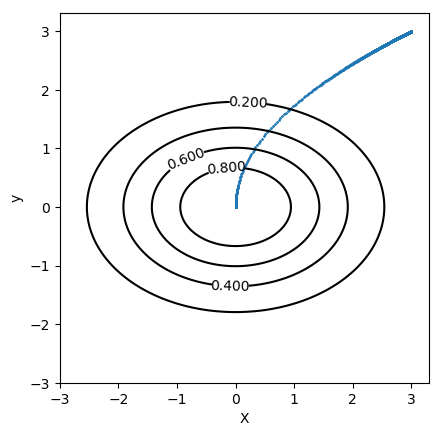

In [10]:
figure()
_cp=contour(xx,yy,z, colors="k", lw=1, levels=5)
ax=gca()
ax[:clabel](_cp, inline=1, fontsize=10)
ax[:set_xlabel]("X")
ax[:set_ylabel]("y")
ax[:scatter](x_steps[:,1], x_steps[:,2], s=1)
lim_x=xlim()
lim_y=ylim()
ax[:set_aspect]((lim_x[2]-lim_x[1])/(lim_y[2]-lim_y[1]))

とりあえず上手く行ったようである。

実際扱う問題では解析的に微分ができるようなことは稀である。  
そこで、偏微分計算も数値的に実装してみた。  
（現在地点から少しだけ座標を動かして関数値の変化分を計算するだけの簡単実装）

In [11]:
# 偏微分
function numeric_partial_diff(f, X, i; h=1e-4)
    h_vec = zero(X)
    h_vec[i] = h
    return (f(X.+h_vec)-f(X.-h_vec)) / (2.0*h)
end

# 勾配
function grad(f, X; h=1e-4)
    ∇f=zero(X)
    for i in 1:length(X)
        ∇f[i]=numeric_partial_diff(f,X,i,h=h)
    end
    return ∇f
end

grad (generic function with 1 method)

計算

In [12]:
μ=[0.0, 0.0]
Σ=[1.0 0.0; 0.0 2.0]
Σ_inv=inv(Σ)
f(x)=exp(-(x-μ)'*Σ_inv*(x-μ) * 0.5)

X₀=[3.0, 3.0]   #[-3,3]より外に出ると計算時間が爆発（勾配消失？）
h₀=1.0
t₀=0.1
δ=1e-8
∇f(X) = grad(f, X)

x,x_steps=hill_climbing(X₀,t₀,δ,f,∇f,h₀=h₀)

([-7.32747e-15, 1.8349e-7], [3.0 3.0; 2.99965 2.99982; … ; -7.32747e-15 1.93147e-7; -7.32747e-15 1.8349e-7])

プロット

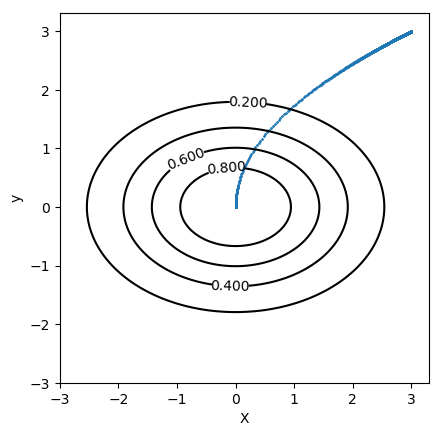

In [13]:
figure()
_cp=contour(xx,yy,z, colors="k", lw=1, levels=5)
ax=gca()
ax[:clabel](_cp, inline=1, fontsize=10)
ax[:set_xlabel]("X")
ax[:set_ylabel]("y")
ax[:scatter](x_steps[:,1], x_steps[:,2], s=1)
lim_x=xlim()
lim_y=ylim()
ax[:set_aspect]((lim_x[2]-lim_x[1])/(lim_y[2]-lim_y[1]))

どうやら上手く行ったようだ。  
めでたしめでたし。